# <p style="background-color:#00FF00;font-family:newtimeroman;color:black;font-size:130%;text-align:center;border-radius:10px 10px;"> "  Mohamed Hamed "Data Analyst" " </p>
<div style="text-align: center;">
    <span style="font-size: 5em;">👌📊📉📈📊📈👌</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       
   </span>
</div>

<br>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.6em; font-weight: bold;font-family: Arial;"><a href="https://www.linkedin.com/in/mohamed-hamed-el-sayed-925a3824a/">"Linked In" Mohamed Hamed</a></span>
</div>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Table of Contents  !! </p>

<div style="border-radius: 5px; border: #022b3a solid; padding: 10px; background-color: #bde0fe; font-size: 100%; text-align: left;">

1. Date: This column represents the date of the sales transaction. It helps in analyzing sales trends over time.

2. Product: This column contains the name or code of the product being sold. It helps in identifying the specific products that are generating sales.

3. Quantity: This column indicates the quantity of the product sold in each transaction. It helps in understanding the demand for different products.

4. Price: This column represents the price of each unit of the product. It helps in calculating the total sales and analyzing pricing strategies.

5. Total Sales: This column is often calculated by multiplying the quantity and price columns. It represents the total revenue generated from each transaction
6.Order Status: This column indicates the status of the order, such as "completed," "pending," or "cancelled." It helps in monitoring order fulfillment and analyzing customer satisfaction.🧐🔍
</div>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Import Libraries  !! </p>

In [68]:
import numpy as np
import pandas as pd
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Load The Sales Dataset  !! </p>

In [69]:
sales = pd.read_csv("Downloads/Sales Data.csv")

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Perform basic EDA  !! </p>

In [70]:
# Display the first few rows of the dataset
sales.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


<div style="border-radius: 5px; border: #efc3e6 solid; padding: 10px; background-color: #fca311; font-size: 100%; text-align: left;">
The code `sales.head()` is used to display the first few rows of a dataset called `sales`. By default, it shows the first 5 rows of the dataset.
📊✔
</div>

In [71]:
# Summary statistics of the numerical columns
sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


<div style="border-radius: 5px; border: #ff0054 solid; padding: 10px; background-color: #3a86ff; font-size: 100%; text-align: left;">
✔The code `sales.describe()` is used to generate summary statistics of the numerical columns in the dataset `sales`. It provides information such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numerical column in the dataset
📊✔
</div>

In [72]:
# Information about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 12.8+ MB


<div style="border-radius: 5px; border: #ffbd00 solid; padding: 10px; background-color: #ff006e; font-size: 100%; text-align: left;">
✔The code `sales.info()` is used to display information about the dataset `sales`. It provides a summary of the dataset's structure, including the number of rows and columns, column names, data types, and the number of non-null values in each column. This information is useful for understanding the dataset's overall composition and identifying any missing or incomplete data.
📊✔
</div>

In [73]:
# Check the shape of the dataset
sales.shape

(185950, 11)

<div style="border-radius: 5px; border: #06d6a0 solid; padding: 10px; background-color: #a9def9; font-size: 100%; text-align: left;">
✔The code `sales.shape` is used to check the shape of the dataset `sales`. It returns a tuple that represents the number of rows and columns in the dataset. The first value in the tuple represents the number of rows, and the second value represents the number of columns.
📊✔
</div>

In [74]:
# Check the data types of each column
sales.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

<div style="border-radius: 5px; border: #ffb7c3 solid; padding: 10px; background-color: #fdf252; font-size: 100%; text-align: left;">
✔The code `sales.dtypes` is used to check the data types of each column in the dataset `sales`. It returns a series that displays the data type of each column. This information is helpful for understanding the types of data stored in each column, which can be useful for data analysis and manipulation.
📊✔
</div>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Data Cleaning !! </p>

<div style="border-radius: 5px; border: #ffc857 solid; padding: 10px; background-color: #ec058e; font-size: 100%; text-align: left;">
✔Data cleaning involves various steps to clean and preprocess the dataset, such as handling missing values, removing duplicates, correcting data types, and handling outliers. Here are some common code snippets for data cleaning:

1. Handling Missing Values:
   - `sales.dropna()`: Drops rows with any missing values.
   - `sales.fillna(value)`: Fills missing values with a specified value.

2. Removing Duplicates:
   - `sales.drop_duplicates()`: Removes duplicate rows from the dataset.

3. Correcting Data Types:
   - `sales['column_name'] = sales['column_name'].astype('new_data_type')`: Converts the data type of a specific column.

4. Handling Outliers:
   - `sales = sales[(sales['column_name'] > lower_limit) & (sales['column_name'] < upper_limit)]`: Removes rows with outliers based on a specified range.

📊✔ Mohamed_Hamed👌👌
</div>

In [75]:
# Check for missing values
sales.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

<div style="border-radius: 5px; border: #ff8c42 solid; padding: 10px; background-color: #deaaff; font-size: 100%; text-align: left;">
✔The code `sales.isnull().sum()` is used to check for missing values in the dataset `sales`. It returns the sum of missing values in each column. 

The `isnull()` function checks each element in the dataset to determine if it is null or missing. It returns a boolean value, where `True` indicates a missing value and `False` indicates a non-missing value. 

The `sum()` function is then applied to the boolean values for each column, resulting in the count of missing values in each column. This information is helpful for identifying columns with missing data and determining the extent of missingness in the dataset.

📊✔ Mohamed_Hamed👌👌
</div>

# <p style="background-color:#FFC0CB;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !!  Data Analysis !! </p>

<div style="border-radius: 5px; border: #2667ff solid; padding: 10px; background-color: #80ed99; font-size: 100%; text-align: left;">
✔. Descriptive Statistics:
   - `sales.describe()`: Generates descriptive statistics for numerical columns, such as count, mean, standard deviation, minimum, and maximum values.

✔. Grouping and Aggregation:
   - `sales.groupby('column_name').mean()`: Groups the data by a specific column and calculates the mean value for each group.
   - `sales.groupby(['column_name1', 'column_name2']).sum()`: Groups the data by multiple columns and calculates the sum of each group.

✔. Data Visualization:
   - `import matplotlib.pyplot as plt`: Importing the matplotlib library for data visualization.
   - `sales['column_name'].plot(kind='hist')`: Plots a histogram for a specific column.
   - `sales.plot(x='column_name1', y='column_name2', kind='scatter')`: Plots a scatter plot between two columns.

✔. Correlation Analysis:
   - `sales.corr()`: Calculates the correlation coefficient between numerical columns.
   - `import seaborn as sns`: Importing the seaborn library for advanced visualization.
   - `sns.heatmap(sales.corr(), annot=True)`: Plots a heatmap of the correlation matrix.

​
📊✔ Mohamed_Hamed👌👌
</div>

In [76]:
# Calculate the total sales
total_sales = sales['Sales'].sum()
print("Total Sales: ", total_sales)

Total Sales:  34492035.97


<div style="border-radius: 5px; border: #70d6ff solid; padding: 10px; background-color: #ffee32; font-size: 100%; text-align: left;">
✔.The code `total_sales = sales['Sales'].sum()` calculates the total sales by summing up the values in the 'Sales' column of the dataset `sales`. 

✔.The `.sum()` function is applied to the 'Sales' column, which returns the sum of all the values in that column. The result is stored in the variable `total_sales`.

✔.The line `print("Total Sales: ", total_sales)` prints the total sales value to the console, along with a descriptive label "Total Sales: ".

🟠This code snippet calculates and displays the total sales value from the 'Sales' column of the dataset.
    
​
📊✔ Mohamed_Hamed👌👌
</div>

In [77]:
# Extract year from 'Month' column and assign it to 'Day' column
sales['Day'] = pd.to_datetime(sales['Month']).dt.day
sales['Day'] 

0         1
1         1
2         1
3         1
4         1
         ..
185945    1
185946    1
185947    1
185948    1
185949    1
Name: Day, Length: 185950, dtype: int64

<div style="border-radius: 5px; border: #f72585 solid; padding: 10px; background-color: #ff7d00; font-size: 100%; text-align: left;">

😊📈The code `sales['Day'] = pd.to_datetime(sales['Month']).dt.day` extracts the day component from the 'Month' column of the dataset `sales` and assigns it to a new column called 'Day'.

📊👌Here's a breakdown of the code:

1. `pd.to_datetime(sales['Month'])`: Converts the values in the 'Month' column to datetime format.
2. `.dt.day`: Accesses the day component of the datetime values.
3. `sales['Day'] = ...`: Assigns the extracted day values to a new column called 'Day' in the `sales` dataset.

🔺After executing this code, the 'Day' column will contain the day component extracted from the 'Month' column for each corresponding row.

🔻The line `sales['Day']` will display the values in the 'Day' column after the assignment.

📊✔ Mohamed_Hamed👌👌
</div>

In [78]:
# Extract year from 'Month' column and assign it to 'Year' column
sales['Year'] = pd.to_datetime(sales['Month']).dt.year
sales['Year'] 

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
185945    1970
185946    1970
185947    1970
185948    1970
185949    1970
Name: Year, Length: 185950, dtype: int64

<div style="border-radius: 5px; border: #ffd6ff solid; padding: 10px; background-color: #f4a259; font-size: 100%; text-align: left;">

😊📈The code `sales['Year'] = pd.to_datetime(sales['Month']).dt.year` extracts the year component from the 'Month' column of the dataset `sales` and assigns it to a new column called 'Year'.

✅Here's a breakdown of the code:

1. `pd.to_datetime(sales['Month'])`: Converts the values in the 'Month' column to datetime format.
2. `.dt.year`: Accesses the year component of the datetime values.
3. `sales['Year'] = ...`: Assigns the extracted year values to a new column called 'Year' in the `sales` dataset.

✔After executing this code, the 'Year' column will contain the year component extracted from the 'Month' column for each corresponding row.

🟠The line `sales['Year']` will display the values in the 'Year' column after the assignment.

📊✔ Mohamed_Hamed👌👌
</div>

In [79]:
# Group the sales data by month and calculate the sum of sales for each month
monthly_sales = sales.groupby('Month')['Sales'].sum()
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

<div style="border-radius: 5px; border: #ffba08 solid; padding: 10px; background-color: #06d6a0; font-size: 100%; text-align: left;">

📊👌The code `monthly_sales = sales.groupby('Month')['Sales'].sum()` groups the sales data in the `sales` dataset by the 'Month' column and calculates the sum of sales for each month.

✔Here's a breakdown of the code:

1. `sales.groupby('Month')`: Groups the data by the unique values in the 'Month' column.
2. `['Sales']`: Selects the 'Sales' column for aggregation.
3. `.sum()`: Calculates the sum of sales for each group.

✔The result is stored in the variable `monthly_sales`, which will be a new DataFrame or Series object with the monthly sales values.

🟠The line `monthly_sales` will display the calculated sum of sales for each month.

📊✔ Mohamed_Hamed👌👌
</div>

In [80]:
# Calculate the total sales by multiplying the price and quantity columns
sales['Total_Sales'] = sales['Price Each'] * sales['Quantity Ordered']
sales

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day,Year,Total_Sales
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1,1970,1700.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,1,1970,600.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,1,1970,11.95
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,1,1970,149.99
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,1,1970,11.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,1,1970,2.99
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,1,1970,149.99
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,1,1970,11.95
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,1,1970,11.95


<div style="border-radius: 5px; border: #ffd60a solid; padding: 10px; background-color: #e4c1f9; font-size: 100%; text-align: left;">

📊The code `sales['Total_Sales'] = sales['Price Each'] * sales['Quantity Ordered']` calculates the total sales by multiplying the values in the 'Price Each' column with the values in the 'Quantity Ordered' column, and assigns the result to a new column called 'Total_Sales' in the `sales` dataset.

✔Here's a breakdown of the code:

1. `sales['Price Each']`: Accesses the values in the 'Price Each' column.
2. `sales['Quantity Ordered']`: Accesses the values in the 'Quantity Ordered' column.
3. `sales['Price Each'] * sales['Quantity Ordered']`: Multiplies the corresponding values in the two columns to calculate the total sales.
4. `sales['Total_Sales'] = ...`: Assigns the calculated total sales values to a new column called 'Total_Sales' in the `sales` dataset.

👌After executing this code, the 'Total_Sales' column will contain the calculated total sales values for each corresponding row.

🟠The line `sales` will display the updated `sales` dataset with the new 'Total_Sales' column.

📊✔ Mohamed_Hamed👌👌
</div>

In [81]:
# Calculate the average sales per month
average_sales_per_month = monthly_sales.mean()
average_sales_per_month

2874336.330833333

<div style="border-radius: 5px; border: #affc41 solid; padding: 10px; background-color: #9bf6ff; font-size: 100%; text-align: left;">

🟠The code `average_sales_per_month = monthly_sales.mean()` calculates the average sales per month by taking the mean of the monthly sales values stored in the `monthly_sales` variable.

🔻Here's a breakdown of the code:

1. `monthly_sales`: Represents the variable that contains the sum of sales for each month, calculated using the `sales.groupby('Month')['Sales'].sum()` code.
2. `.mean()`: Calculates the average of the monthly sales values.

✔The result is stored in the variable `average_sales_per_month`, which will be a single value representing the average sales per month.

🟠The line `average_sales_per_month` will display the calculated average sales per month.
    
    
📊✔ Mohamed_Hamed👌👌
</div>

In [82]:
# Calculate the maximum Sales
max_sales = sales['Sales'].max()
max_sales

3400.0

<div style="border-radius: 5px; border: #03daf7 solid; padding: 10px; background-color: #ffff3f; font-size: 100%; text-align: left;">

✔The code `max_sales = sales['Sales'].max()` calculates the maximum sales by finding the highest value in the 'Sales' column of the `sales` dataset.

✔Here's a breakdown of the code:

1. `sales['Sales']`: Accesses the values in the 'Sales' column.
2. `.max()`: Finds the maximum value among the values in the 'Sales' column.

👌The result is stored in the variable `max_sales`, which will be a single value representing the maximum sales value.

🟠The line `max_sales` will display the calculated maximum sales value.


📊✔ Mohamed_Hamed👌👌
</div>

In [83]:
# Calculate the minimum sales
min_sales = sales['Sales'].min()
min_sales

2.99

<div style="border-radius: 5px; border: #45ed88 solid; padding: 10px; background-color: #fbbfca; font-size: 100%; text-align: left;">

👌The code `min_sales = sales['Sales'].min()` calculates the minimum sales by finding the lowest value in the 'Sales' column of the `sales` dataset.

🟠Here's a breakdown of the code:

1. `sales['Sales']`: Accesses the values in the 'Sales' column.
2. `.min()`: Finds the minimum value among the values in the 'Sales' column.

👍The result is stored in the variable `min_sales`, which will be a single value representing the minimum sales value.

✔The line `min_sales` will display the calculated minimum sales value.


📊✔ Mohamed_Hamed👌👌
</div>

In [84]:
#Calculate the total sales by product category
sales_by_category = sales.groupby('Product')['Sales'].sum()
sales_by_category

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

<div style="border-radius: 5px; border: #f9c22e solid; padding: 10px; background-color: #ec058e; font-size: 100%; text-align: left;">

🔻The code `min_sales = sales['Sales'].min()` calculates the minimum sales by finding the lowest value in the 'Sales' column of the `sales` dataset.

🔺Here's a breakdown of the code:

1. `sales['Sales']`: Accesses the values in the 'Sales' column.
2. `.min()`: Finds the minimum value among the values in the 'Sales' column.

✔The result is stored in the variable `min_sales`, which will be a single value representing the minimum sales value.

🟠The line `min_sales` will display the calculated minimum sales value.


📊✔ Mohamed_Hamed👌👌
</div>

In [85]:
# Calculate the total sales by region
sales_by_region = sales.groupby('Purchase Address')['Sales'].sum()/2
sales_by_region

Purchase Address
1 11th St, Atlanta, GA 30301                5.975
1 11th St, Los Angeles, CA 90001          850.000
1 11th St, San Francisco, CA 94016        350.000
1 12th St, Los Angeles, CA 90001           75.000
1 12th St, New York City, NY 10001          5.995
                                           ...   
999 Wilson St, Atlanta, GA 30301           49.995
999 Wilson St, Los Angeles, CA 90001      499.995
999 Wilson St, New York City, NY 10001     75.000
999 Wilson St, Portland, OR 97035           1.495
999 Wilson St, San Francisco, CA 94016     75.000
Name: Sales, Length: 140787, dtype: float64

<div style="border-radius: 5px; border: #e76f51 solid; padding: 10px; background-color: #8ecae6; font-size: 100%; text-align: left;">

😊✔The code you provided calculates the total sales by region using pandas in Python. It groups the sales data by the "Purchase Address" column and then calculates the sum of the "Sales" column for each group. Finally, it divides the sum by 2.

📊✔ Mohamed_Hamed👌👌
</div>

In [86]:
# Calculate the average sales by region ✔
average_sales_by_region =sales.groupby(['Purchase Address'])['Sales'].mean()
average_sales_by_region 

Purchase Address
1 11th St, Atlanta, GA 30301                11.95
1 11th St, Los Angeles, CA 90001          1700.00
1 11th St, San Francisco, CA 94016         700.00
1 12th St, Los Angeles, CA 90001           150.00
1 12th St, New York City, NY 10001          11.99
                                           ...   
999 Wilson St, Atlanta, GA 30301            99.99
999 Wilson St, Los Angeles, CA 90001       999.99
999 Wilson St, New York City, NY 10001     150.00
999 Wilson St, Portland, OR 97035            2.99
999 Wilson St, San Francisco, CA 94016     150.00
Name: Sales, Length: 140787, dtype: float64

<div style="border-radius: 5px; border: #fca311 solid; padding: 10px; background-color: #ffafcc; font-size: 100%; text-align: left;">

🟠The code calculates the average sales by region. It uses the `groupby` function to group the data by the "Purchase Address" column and then calculates the mean of the "Sales" column for each group. The result is a Series object with the average sales for each region.
    
    
📊✔ Mohamed_Hamed👌👌
</div>

In [87]:
# Calculate the average sales by category ✔
average_sales_by_category =sales.groupby(['Product'])['Sales'].mean()
average_sales_by_category

Product
20in Monitor                   110.740968
27in 4K Gaming Monitor         390.866382
27in FHD Monitor               150.849141
34in Ultrawide Monitor         381.096588
AA Batteries (4-pack)            5.157137
AAA Batteries (4-pack)           4.493040
Apple Airpods Headphones       151.080455
Bose SoundSport Headphones     100.980520
Flatscreen TV                  301.187500
Google Phone                   600.760181
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        16.026140
Macbook Pro Laptop            1701.439458
ThinkPad Laptop               1000.474491
USB-C Charging Cable            13.080457
Vareebadd Phone                400.581114
Wired Headphones                13.053619
iPhone                         700.716165
Name: Sales, dtype: float64

<div style="border-radius: 5px; border: #ff006e solid; padding: 10px; background-color: #3a86ff; font-size: 100%; text-align: left;">

✔The code calculates the average sales by category. It uses the `groupby` function to group the data by the "Product" column and then calculates the mean of the "Sales" column for each group. The result is a Series object with the average sales for each category.
    
📊✔ Mohamed_Hamed👌👌
</div>

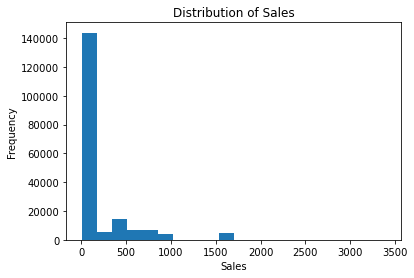

In [88]:
# Visualize the distribution of sales using a histogram
plt.hist(sales['Sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

<div style="border-radius: 5px; border: #7209b7 solid; padding: 10px; background-color: #ffbe0b; font-size: 100%; text-align: left;">

📊👌The code visualizes the distribution of sales using a histogram. It uses the `hist` function from the `matplotlib.pyplot` library to create the histogram. The data for the histogram is taken from the "Sales" column of the "sales" DataFrame. The `bins` parameter is set to 20 to specify the number of bins in the histogram. The `xlabel`, `ylabel`, and `title` functions are used to set the labels and title for the histogram. Finally, the `show` function is called to display the histogram.
    
    
📊✔ Mohamed_Hamed👌👌
</div>

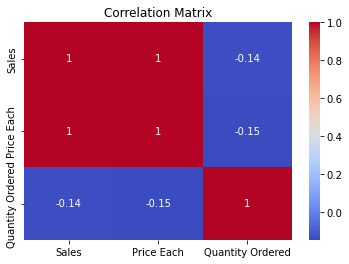

In [90]:
# Calculate and visualize the correlation between numerical variables
corr_matrix = sales[['Sales', 'Price Each', 'Quantity Ordered']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style="border-radius: 5px; border: #9b5de5 solid; padding: 10px; background-color: #00f5d4; font-size: 100%; text-align: left;">

🟠The code calculates the correlation between numerical variables and visualizes it using a heatmap. 

✔First, the `corr` function is applied to the `sales` DataFrame to calculate the correlation matrix between the columns 'Sales', 'Price Each', and 'Quantity Ordered'. The result is stored in the `corr_matrix` variable.

✔Then, the `heatmap` function from the `seaborn` library is used to create a heatmap of the correlation matrix. The `annot` parameter is set to `True` to display the correlation values on the heatmap. The `cmap` parameter is set to 'coolwarm' to specify the color scheme of the heatmap.

✔The `title` function is used to set the title of the heatmap.

✔Finally, the `show` function is called to display the heatmap.
    
    
📊✔ Mohamed_Hamed👌👌
</div>

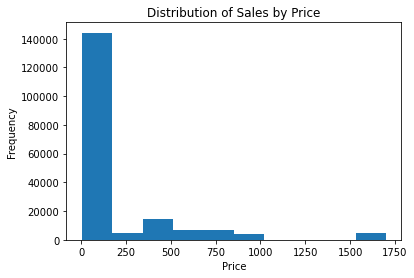

In [97]:
# Histogram of sales by price
plt.hist(sales['Price Each'], bins=10)
plt.title('Distribution of Sales by Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<div style="border-radius: 5px; border: #fee440 solid; padding: 10px; background-color: #ffb4a2; font-size: 100%; text-align: left;">

😊👌The code creates a histogram of sales by price. 

📉It uses the `hist` function from the `matplotlib.pyplot` library to create the histogram. The data for the histogram is taken from the "Price Each" column of the "sales" DataFrame. The `bins` parameter is set to 10 to specify the number of bins in the histogram.

📊The `title`, `xlabel`, and `ylabel` functions are used to set the title, x-axis label, and y-axis label for the histogram.

👌Finally, the `show` function is called to display the histogram.
    
📊✔ Mohamed_Hamed👌👌
</div>

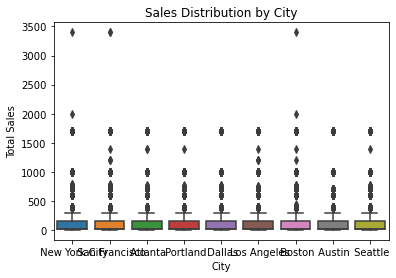

In [106]:
# Box plot of sales by region
sns.boxplot(x='City', y='Total_Sales', data=sales)
plt.title('Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

<div style="border-radius: 5px; border: #27187e solid; padding: 10px; background-color: #ffff3f; font-size: 100%; text-align: left;">

👍✅The code creates a box plot to visualize the distribution of sales by region (city).

🟡First, the `boxplot` function from the `seaborn` library is used. The `x` parameter is set to 'City' to specify the categorical variable (region) to be plotted on the x-axis, and the `y` parameter is set to 'Total_Sales' to specify the numerical variable (sales) to be plotted on the y-axis. The `data` parameter is set to the `sales` DataFrame to specify the data source.

🟢The `title` function is used to set the title of the box plot.

🟣The `xlabel` and `ylabel` functions are used to set the labels for the x-axis and y-axis, respectively.

👌✔Finally, the `show` function is called to display the box plot.
    
    
📊✔ Mohamed_Hamed👌👌
</div>

# <p style="background-color:#3772ff;font-family:newtimeroman;color:black;font-size:200%;text-align:center;border-radius:10px 10px;"> !! 😊 Thank You 😊  !! </p>